In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import cifar10
import keras
from keras.layers import Dense, Dropout, Activation, Flatten

In [51]:
batch_size = 6000
num_classes = 10

# input image dimensions
img_rows, img_cols, rgb = 32, 32, 3

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, rgb)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, rgb)
input_shape = img_rows * img_cols, rgb

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


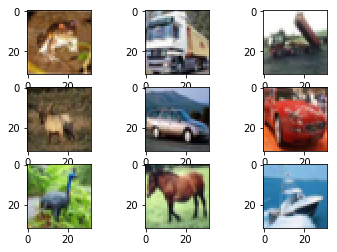

In [53]:
import matplotlib.pyplot as plt


for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
# show the plot
plt.show()

In [55]:
from scikit-image import color

print('Max value before normalization:', x_train.max())

x_train = color.rgb2gray(x_train)
x_test = color.rgb2gray(x_test)

print('Max value after normalization:', x_train.max())

print('Train shape:', x_train.shape)
print('Test shape:', x_test.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

ImportError: No module named 'skimage'

In [47]:
perceptron = Sequential()
perceptron.add(Dense(30, activation='sigmoid', input_shape=(input_shape,)))
perceptron.add(Dense(10, activation='sigmoid'))

perceptron.compile(loss='binary_crossentropy', optimizer='sgd')
perceptron.fit(x_train, y_train, epochs=5)

TypeError: Error converting shape to a TensorShape: int() argument must be a string, a bytes-like object or a number, not 'tuple'.

In [29]:
keras.regularizers.l1(0.)
keras.regularizers.l2(0.)
keras.regularizers.l1_l2(0.)



In [30]:
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
keras.initializers.Zeros()

In [38]:
model = Sequential()
model.add(Dense(512, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), kernel_regularizer=keras.regularizers.l1(0.), 
                input_shape=(50000, 3072)))
model.add(Activation('sigmoid'))

model.add(Dense(512, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), kernel_regularizer=keras.regularizers.l1(0.),))
model.add(Activation('sigmoid'))

model.add(Dense(num_classes,kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), kernel_regularizer=keras.regularizers.l1(0.),))

model.add(Activation('softmax'))



In [39]:
from keras.optimizers import SGD
SGD()
optimizer =SGD(lr=0.1, momentum=0, nesterov=False)


In [40]:
# mse
model.compile(
              #optimizer='sgd',
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50000, 512)        1573376   
_________________________________________________________________
activation_7 (Activation)    (None, 50000, 512)        0         
_________________________________________________________________
dense_10 (Dense)             (None, 50000, 512)        262656    
_________________________________________________________________
activation_8 (Activation)    (None, 50000, 512)        0         
_________________________________________________________________
dense_11 (Dense)             (None, 50000, 10)         5130      
_________________________________________________________________
activation_9 (Activation)    (None, 50000, 10)         0         
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [42]:
len(x_train)

50000

In [43]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, epochs=2)

ValueError: Error when checking input: expected dense_9_input to have 3 dimensions, but got array with shape (50000, 3072)

In [187]:
model.predict(x_test[0:2])*10000

array([[  2.06124706e+01,   1.20912771e+01,   1.80591774e+01,
          2.69576321e+01,   4.11092438e+02,   9.09948502e+01,
          8.14581585e+00,   8.07906494e+03,   5.44757080e+01,
          1.27850562e+03],
       [  3.88401733e+02,   2.79505127e+02,   4.51911377e+03,
          1.36051343e+03,   1.26367598e+01,   7.54880432e+02,
          1.79255188e+03,   2.95495534e+00,   8.81593628e+02,
          7.84754705e+00]], dtype=float32)

In [176]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.318743483448
Test accuracy: 0.9069


In [177]:
[test_loss, test_acc] = model.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 65us/step
Evaluation result on Test Data : Loss = 0.31874348344802855, accuracy = 0.9069


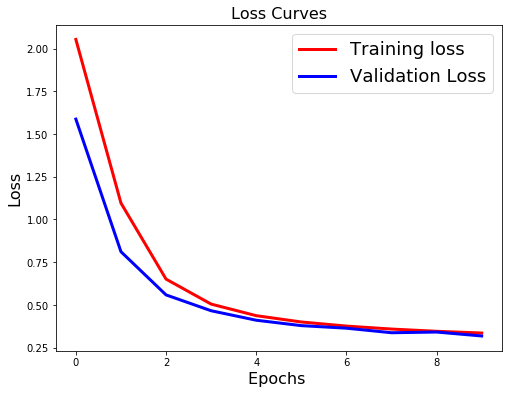

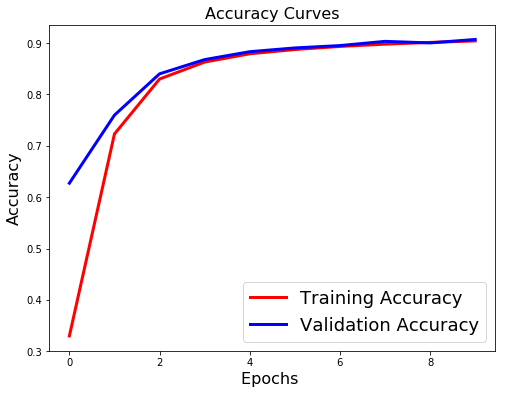

In [178]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()